In [31]:
print("Phan Đức An - 6351071001")

Phan Đức An - 6351071001


## Import thư viện

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

## Câu 1: Nhập dữ liệu và thống kê số lượng

In [33]:
# Đọc dữ liệu huấn luyện
train_data = pd.read_csv('datasets/adult.data.csv')
print("Số lượng dữ liệu huấn luyện:", len(train_data))
print("\nThông tin dữ liệu huấn luyện:")
print(train_data.info())
print("\nMẫu dữ liệu huấn luyện:")
display(train_data.head())

Số lượng dữ liệu huấn luyện: 32561

Thông tin dữ liệu huấn luyện:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Mẫu dữ liệu huấn luyệ

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# Đọc dữ liệu kiểm thử
test_data = pd.read_csv('datasets/adult.test.csv')
print("Số lượng dữ liệu kiểm thử:", len(test_data))
print("\nThông tin dữ liệu kiểm thử:")
print(test_data.info())
print("\nMẫu dữ liệu kiểm thử:")
display(test_data.head())

Số lượng dữ liệu kiểm thử: 16281

Thông tin dữ liệu kiểm thử:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   education       16281 non-null  object
 3   education-num   16281 non-null  int64 
 4   marital-status  16281 non-null  object
 5   occupation      16281 non-null  object
 6   relationship    16281 non-null  object
 7   race            16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16281 non-null  object
 13  income          16281 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB
None

Mẫu dữ liệu kiểm thử:


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
# Tổng kết
print("="*60)
print("TỔNG KẾT SỐ LƯỢNG DỮ LIỆU")
print("="*60)
print(f"Số lượng dữ liệu huấn luyện: {len(train_data)}")
print(f"Số lượng dữ liệu kiểm thử: {len(test_data)}")
print(f"Tổng số dữ liệu: {len(train_data) + len(test_data)}")
print("="*60)

TỔNG KẾT SỐ LƯỢNG DỮ LIỆU
Số lượng dữ liệu huấn luyện: 32561
Số lượng dữ liệu kiểm thử: 16281
Tổng số dữ liệu: 48842


## Câu 2: Tiền xử lý dữ liệu

In [36]:
# Lưu số lượng ban đầu để tách sau này
train_size = len(train_data)
test_size = len(test_data)
print(f"Kích thước dữ liệu huấn luyện ban đầu: {train_size}")
print(f"Kích thước dữ liệu kiểm thử ban đầu: {test_size}")

Kích thước dữ liệu huấn luyện ban đầu: 32561
Kích thước dữ liệu kiểm thử ban đầu: 16281


In [37]:
# Xóa cột 'fnlwgt' trong dữ liệu huấn luyện
if 'fnlwgt' in train_data.columns:
    train_data = train_data.drop('fnlwgt', axis=1)
    print("Đã xóa cột 'fnlwgt' trong dữ liệu huấn luyện")

print("\nCác cột trong train_data:", train_data.columns.tolist())
print("Các cột trong test_data:", test_data.columns.tolist())

Đã xóa cột 'fnlwgt' trong dữ liệu huấn luyện

Các cột trong train_data: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Các cột trong test_data: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [38]:
# Xóa các dòng có chứa dấu '?'
print("Trước khi xóa dữ liệu trống:")
print(f"  Train: {len(train_data)} dòng")
print(f"  Test: {len(test_data)} dòng")

# Thay thế các giá trị có khoảng trắng và dấu '?' thành NaN
train_data = train_data.replace(' ?', np.nan)
test_data = test_data.replace(' ?', np.nan)

# Xóa các dòng có giá trị NaN
train_data = train_data.dropna()
test_data = test_data.dropna()

print("\nSau khi xóa dữ liệu trống:")
print(f"  Train: {len(train_data)} dòng")
print(f"  Test: {len(test_data)} dòng")

Trước khi xóa dữ liệu trống:
  Train: 32561 dòng
  Test: 16281 dòng

Sau khi xóa dữ liệu trống:
  Train: 30162 dòng
  Test: 15060 dòng


In [39]:
# Lưu lại kích thước sau khi làm sạch để tách về sau
train_size_clean = len(train_data)
test_size_clean = len(test_data)

# Nối dữ liệu huấn luyện và kiểm thử lại với nhau
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
print(f"\nKích thước dữ liệu sau khi nối: {len(data)}")
print(f"Số cột: {len(data.columns)}")
print("\nThông tin dữ liệu sau khi tiền xử lý:")
print(data.info())


Kích thước dữ liệu sau khi nối: 45222
Số cột: 14

Thông tin dữ liệu sau khi tiền xử lý:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB
None


## Câu 3: Khảo sát độ tương đồng (Pearson Correlation)

In [40]:
# Tính ma trận tương quan Pearson cho các cột số
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

print("Ma trận tương quan Pearson:")
display(correlation_matrix)

Ma trận tương quan Pearson:


,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
education-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


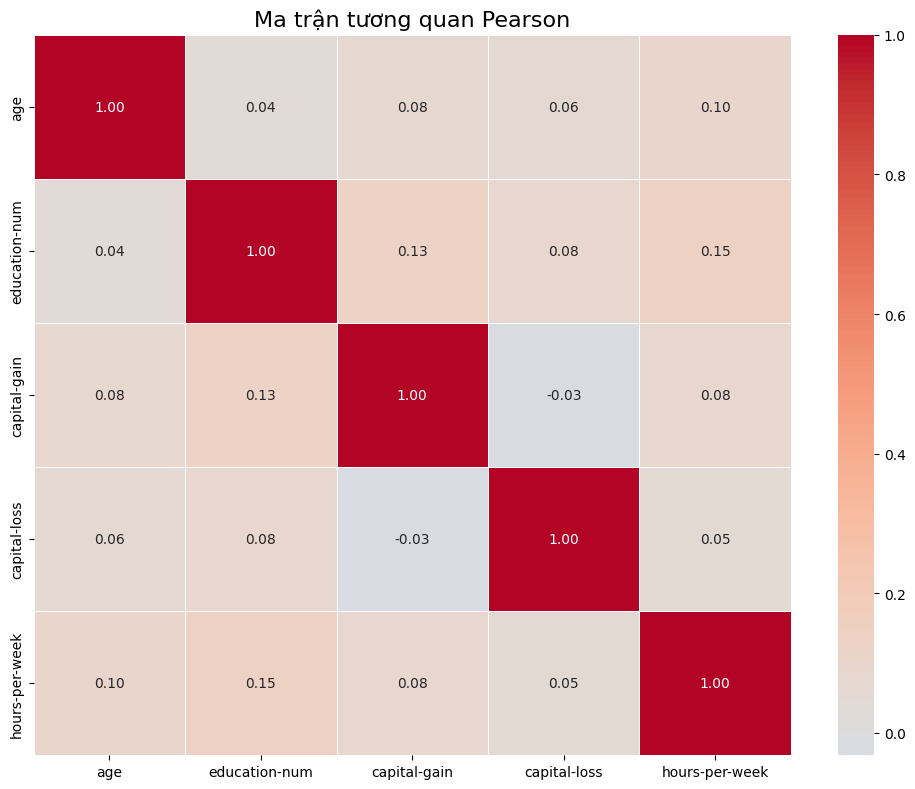


Nhận xét: Không có cặp thuộc tính nào có độ tương quan cao (>0.8)
Không cần thiết phải loại bỏ cột nào.


In [41]:
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan Pearson', fontsize=16)
plt.tight_layout()
plt.show()

print("\nNhận xét: Không có cặp thuộc tính nào có độ tương quan cao (>0.8)")
print("Không cần thiết phải loại bỏ cột nào.")

## Câu 4: Tách features và labels

In [42]:
# Tách thuộc tính quyết định 'income' ra khỏi dữ liệu
features = data.drop('income', axis=1)
labels = data['income']

print(f"Kích thước features: {features.shape}")
print(f"Kích thước labels: {labels.shape}")
print(f"\nCác cột trong features:\n{features.columns.tolist()}")
print(f"\nPhân bố labels:\n{labels.value_counts()}")

Kích thước features: (45222, 13)
Kích thước labels: (45222,)

Các cột trong features:
['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

Phân bố labels:
income
<=50K    34014
>50K     11208
Name: count, dtype: int64


## Câu 5: Chuyển đổi về dạng One-Hot Vector

In [43]:
# Xác định các cột không phải dạng số
categorical_cols = features.select_dtypes(include=['object']).columns
print(f"Các cột categorical cần chuyển đổi:\n{categorical_cols.tolist()}")

Các cột categorical cần chuyển đổi:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [44]:
# Lưu số lượng cột ban đầu để so sánh
num_cols_before = features.shape[1]
print(f"Số lượng cột trước khi encoding: {num_cols_before}")
print(f"Số lượng cột categorical: {len(categorical_cols)}")

Số lượng cột trước khi encoding: 13
Số lượng cột categorical: 8


In [45]:
# Chuyển đổi các cột categorical về dạng one-hot vector
features = pd.get_dummies(features, columns=categorical_cols)

print(f"\nKích thước features sau khi one-hot encoding: {features.shape}")
print(f"Số lượng cột sau encoding: {len(features.columns)}")
print(f"\nMột số cột đầu tiên:\n{features.columns[:20].tolist()}")


Kích thước features sau khi one-hot encoding: (45222, 103)
Số lượng cột sau encoding: 103

Một số cột đầu tiên:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm']


## Câu 6: Tách dữ liệu huấn luyện và kiểm thử

In [15]:
# Tách features về train và test như ban đầu
X_train = features[:train_size_clean]
X_test = features[train_size_clean:]

# Tách labels về train và test như ban đầu
y_train = labels[:train_size_clean]
y_test = labels[train_size_clean:]

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước y_test: {y_test.shape}")

Kích thước X_train: (30162, 103)
Kích thước X_test: (15060, 103)
Kích thước y_train: (30162,)
Kích thước y_test: (15060,)


## Câu 7: Xây dựng cây quyết định ID3 (criterion='entropy')

In [16]:
# Xây dựng mô hình cây ID3
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

print("Mô hình cây ID3 đã được huấn luyện")
print(f"Độ sâu của cây: {id3_model.get_depth()}")
print(f"Số lượng lá: {id3_model.get_n_leaves()}")

Mô hình cây ID3 đã được huấn luyện
Độ sâu của cây: 54
Số lượng lá: 5321


In [17]:
# Dự đoán trên tập kiểm thử
y_pred_id3 = id3_model.predict(X_test)

# Tính toán độ chính xác
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
print(f"Độ chính xác của mô hình ID3: {accuracy_id3:.4f}")

# In classification report
print("\nClassification Report (ID3):")
print(classification_report(y_test, y_pred_id3))

Độ chính xác của mô hình ID3: 0.8157

Classification Report (ID3):
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.63      0.61      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.81      0.82      0.81     15060



In [18]:
# Tính toán ma trận nhầm lẫn
cm_id3 = confusion_matrix(y_test, y_pred_id3)
print("Ma trận nhầm lẫn (ID3):")
print(cm_id3)

Ma trận nhầm lẫn (ID3):
[[10026  1334]
 [ 1441  2259]]


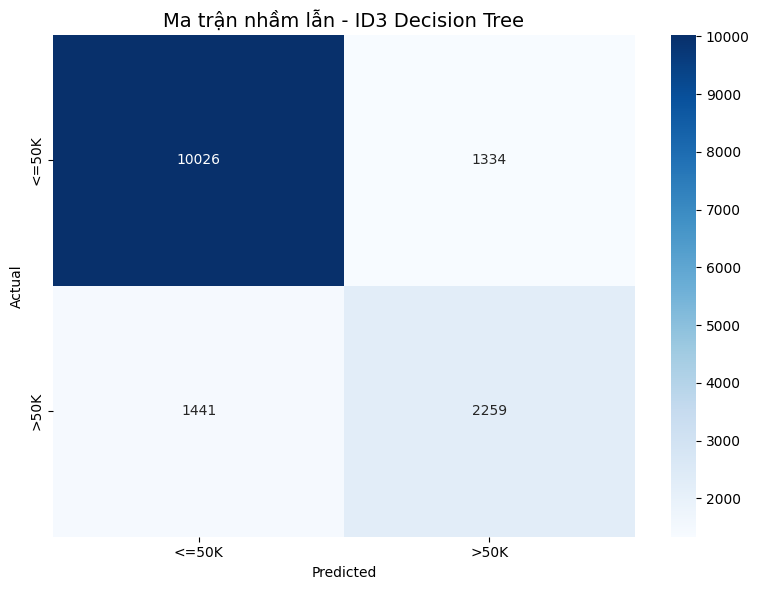

In [19]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_id3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title('Ma trận nhầm lẫn - ID3 Decision Tree', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

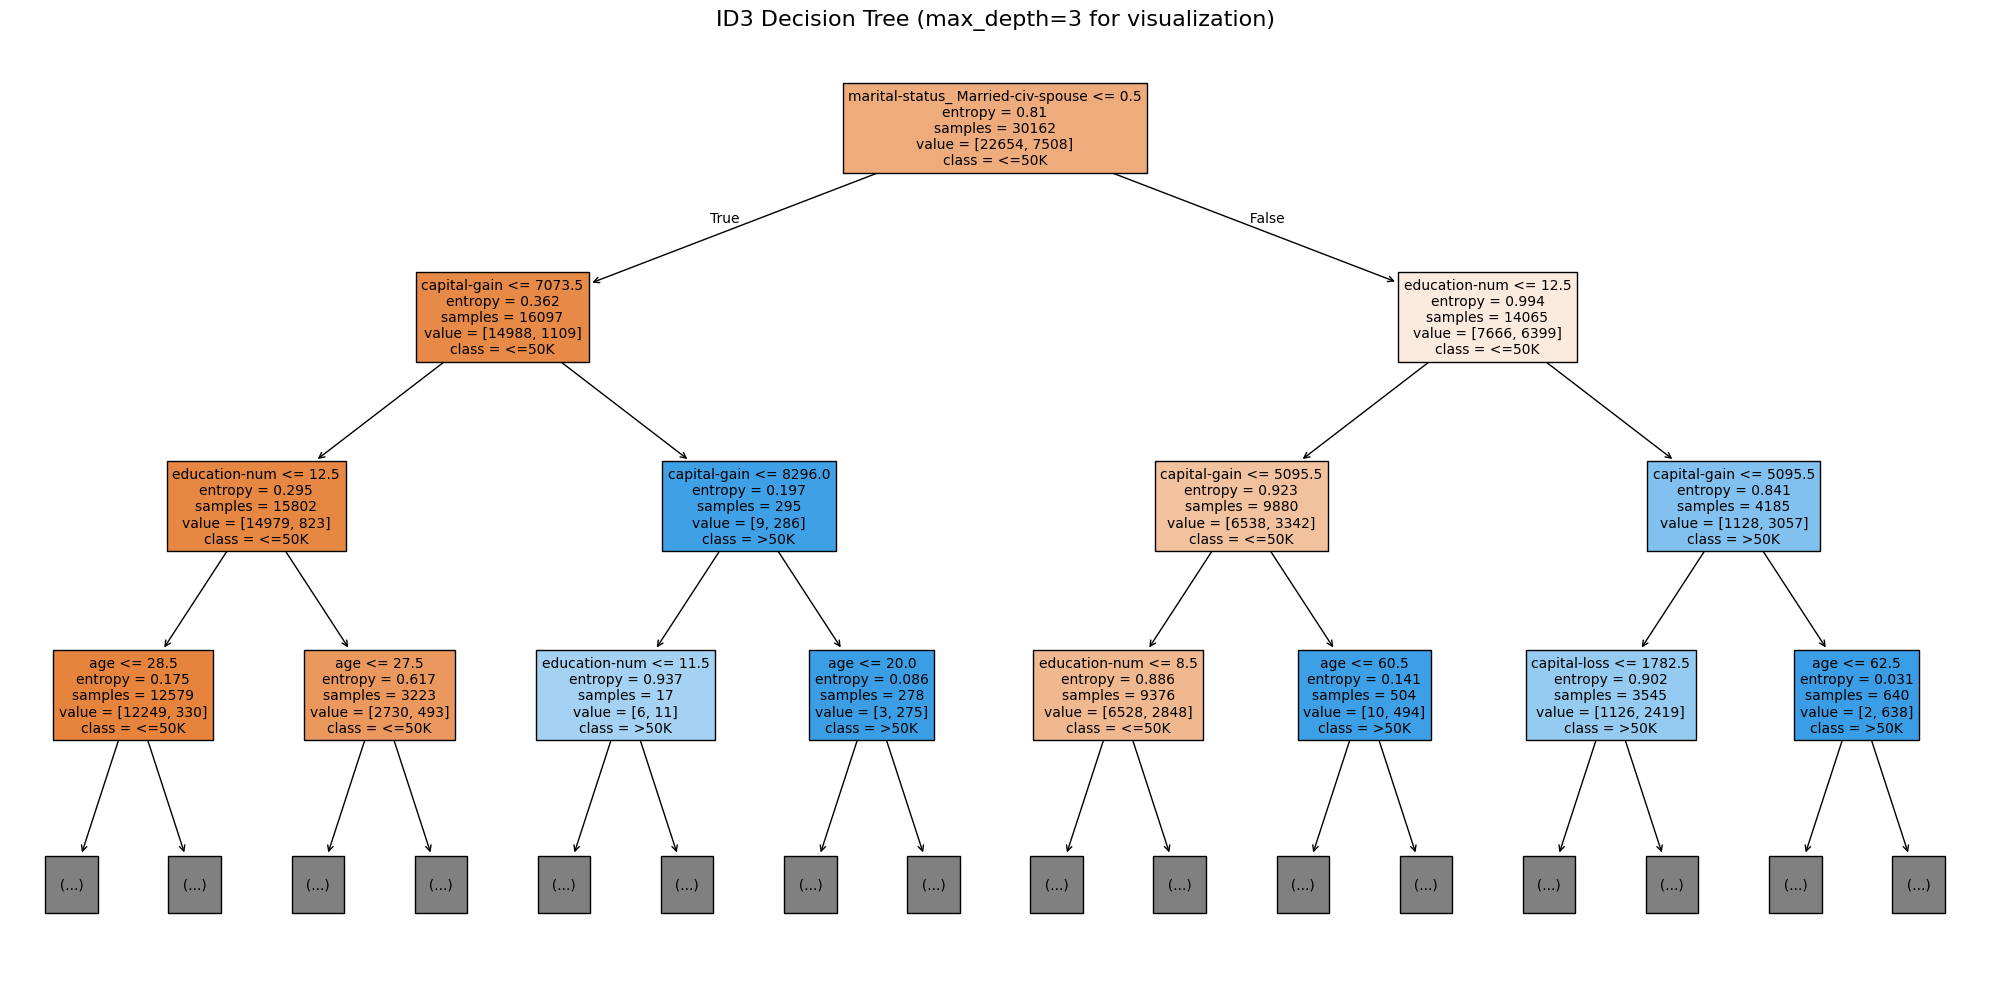

Đã lưu cây ID3 vào file 'id3_decision_tree.png'


In [20]:
# Biểu diễn cây ID3 (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(20, 10))
tree.plot_tree(id3_model, 
               feature_names=X_train.columns, 
               class_names=['<=50K', '>50K'],
               filled=True, 
               max_depth=3,  # Giới hạn độ sâu hiển thị
               fontsize=10)
plt.title('ID3 Decision Tree (max_depth=3 for visualization)', fontsize=16)
plt.tight_layout()
plt.savefig('id3_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây ID3 vào file 'id3_decision_tree.png'")

## Câu 8: Xây dựng cây quyết định CART (criterion='gini')

In [21]:
# Xây dựng mô hình cây CART
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

print("Mô hình cây CART đã được huấn luyện")
print(f"Độ sâu của cây: {cart_model.get_depth()}")
print(f"Số lượng lá: {cart_model.get_n_leaves()}")

Mô hình cây CART đã được huấn luyện
Độ sâu của cây: 46
Số lượng lá: 5344


In [22]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_model.predict(X_test)

# Tính toán độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"Độ chính xác của mô hình CART: {accuracy_cart:.4f}")

# In classification report
print("\nClassification Report (CART):")
print(classification_report(y_test, y_pred_cart))

Độ chính xác của mô hình CART: 0.8129

Classification Report (CART):
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.75     15060
weighted avg       0.81      0.81      0.81     15060



In [23]:
# Tính toán ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Ma trận nhầm lẫn (CART):")
print(cm_cart)

Ma trận nhầm lẫn (CART):
[[10006  1354]
 [ 1463  2237]]


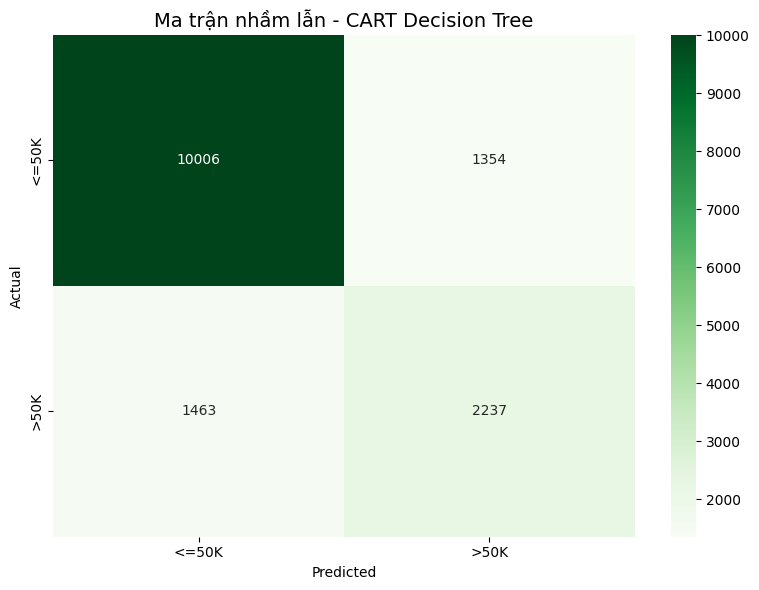

In [24]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title('Ma trận nhầm lẫn - CART Decision Tree', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

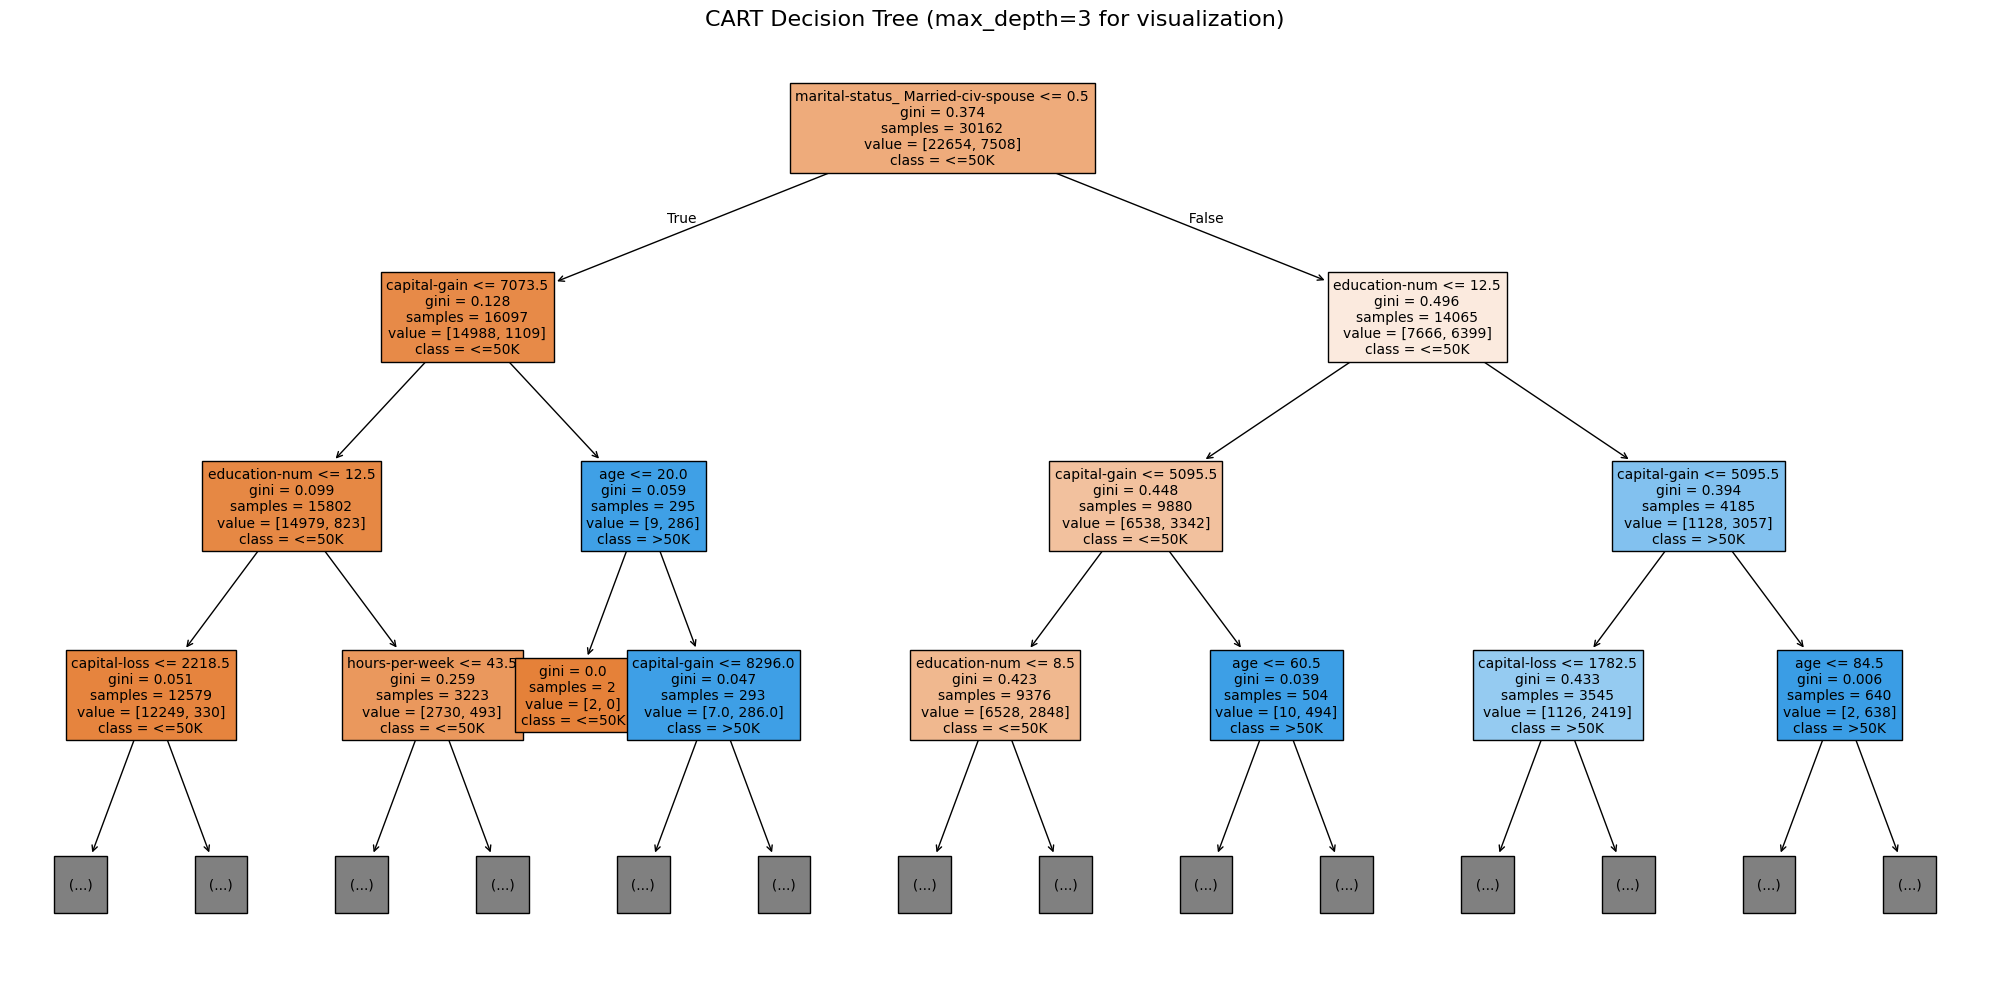

Đã lưu cây CART vào file 'cart_decision_tree.png'


In [25]:
# Biểu diễn cây CART (giới hạn độ sâu để dễ quan sát)
plt.figure(figsize=(20, 10))
tree.plot_tree(cart_model, 
               feature_names=X_train.columns, 
               class_names=['<=50K', '>50K'],
               filled=True, 
               max_depth=3,  # Giới hạn độ sâu hiển thị
               fontsize=10)
plt.title('CART Decision Tree (max_depth=3 for visualization)', fontsize=16)
plt.tight_layout()
plt.savefig('cart_decision_tree.png', dpi=100, bbox_inches='tight')
plt.show()
print("Đã lưu cây CART vào file 'cart_decision_tree.png'")

## Câu 9: Xây dựng mô hình Naïve Bayes

In [26]:
# Xây dựng mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Mô hình Naïve Bayes đã được huấn luyện")

Mô hình Naïve Bayes đã được huấn luyện


In [27]:
# Dự đoán trên tập kiểm thử
y_pred_nb = nb_model.predict(X_test)

# Tính toán độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác của mô hình Naïve Bayes: {accuracy_nb:.4f}")

# In classification report
print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))

Độ chính xác của mô hình Naïve Bayes: 0.8029

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [28]:
# Tính toán ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Ma trận nhầm lẫn (Naïve Bayes):")
print(cm_nb)

Ma trận nhầm lẫn (Naïve Bayes):
[[9073 2287]
 [ 681 3019]]


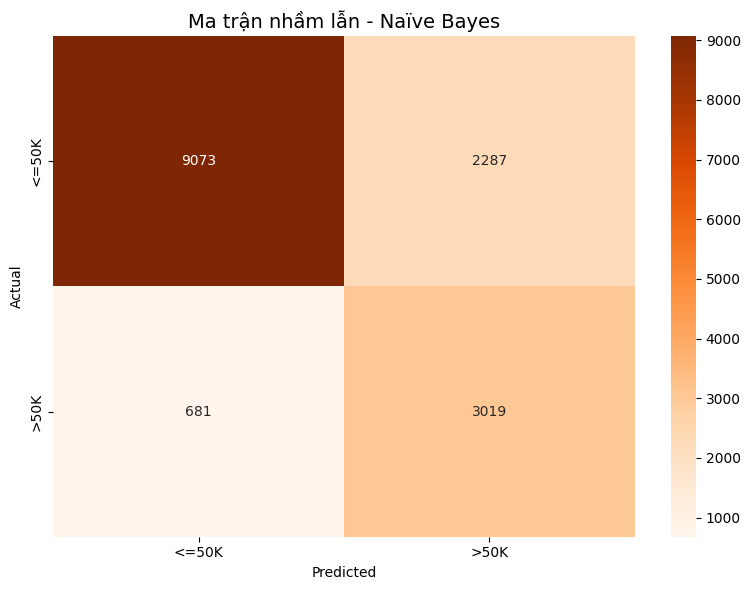

In [29]:
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.title('Ma trận nhầm lẫn - Naïve Bayes', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## Câu 10: So sánh kết quả các mô hình

In [30]:
# Tổng hợp kết quả
results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [accuracy_id3, accuracy_cart, accuracy_nb]
})

print("="*60)
print("SO SÁNH KẾT QUẢ CÁC MÔ HÌNH")
print("="*60)
display(results)
print("="*60)

SO SÁNH KẾT QUẢ CÁC MÔ HÌNH


,Model,Accuracy
0,ID3 (Entropy),0.815737
1,CART (Gini),0.812948
2,Naïve Bayes,0.802922


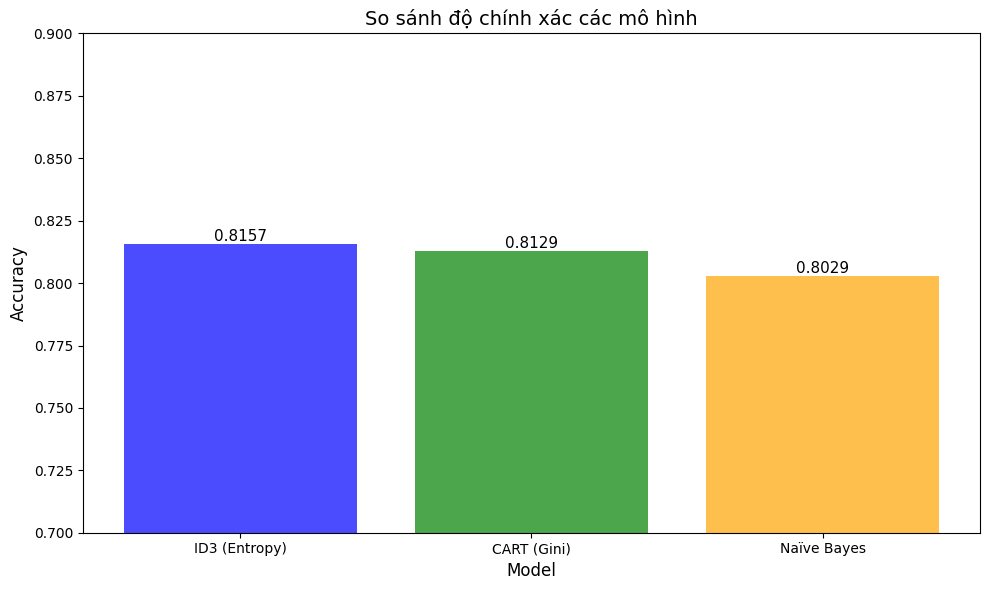

In [48]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Accuracy'], 
               color=['blue', 'green', 'orange'], alpha=0.7)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('So sánh độ chính xác các mô hình', fontsize=14)
plt.ylim([0.7, 0.9])

# Thêm giá trị trên các cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()